In [505]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , GridSearchCV

In [506]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [507]:
df.shape

(7043, 21)

In [508]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [509]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [510]:
# We have to remove customer id column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [511]:
df.drop('customerID' , inplace=True , axis=1)

In [512]:
# Collect categorical column
cat_column = []
for col in df.columns:
  if df[col].dtype == 'O':
    cat_column.append(col)


In [513]:
cat_column

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [514]:
for col in cat_column:
  print(df[col].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [515]:
# Total charges should be float
type(df['TotalCharges'][0])

str

In [516]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [517]:
# We simply remove blank total charges column
df[df['TotalCharges'] != ' '].shape , df.shape


((7032, 20), (7043, 20))

In [518]:
df = df[df['TotalCharges'] != ' ']

In [519]:
# This step will be added in preprocessing function
df['TotalCharges'] = df['TotalCharges'].astype(float)

<ipython-input-519-40376d9baa6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [520]:
cat_column.remove('TotalCharges')
cat_column

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [521]:
for col in cat_column:
  print(col , df[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [522]:
# In multilines ,TechSupport ,  ....  we should replce No phone service to No , because it doesnot make sense
df = df.replace({'No internet service' : 'No' , 'No phone service':'No'})

In [523]:
for col in cat_column:
  print(col , df[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [524]:
# Here we apply EDA and do feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

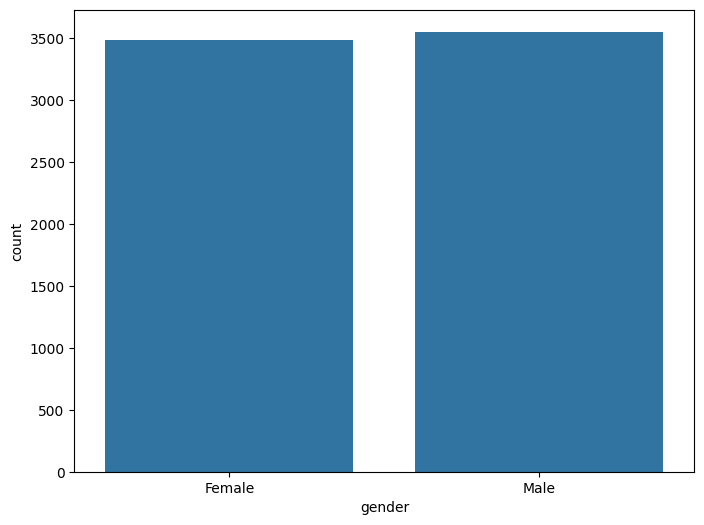

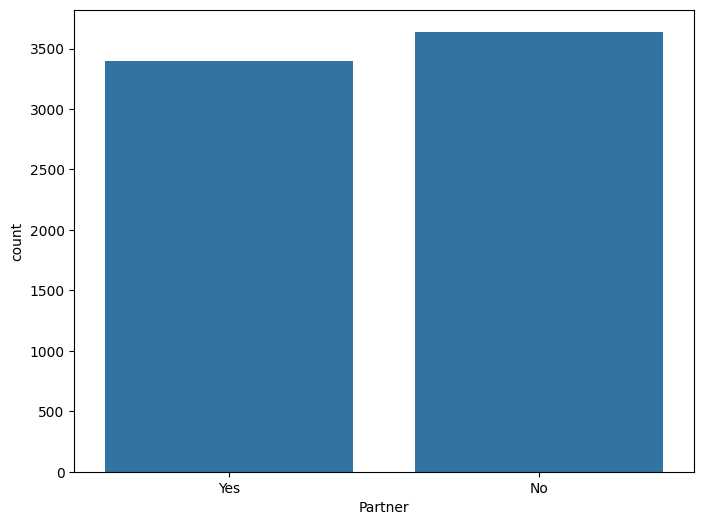

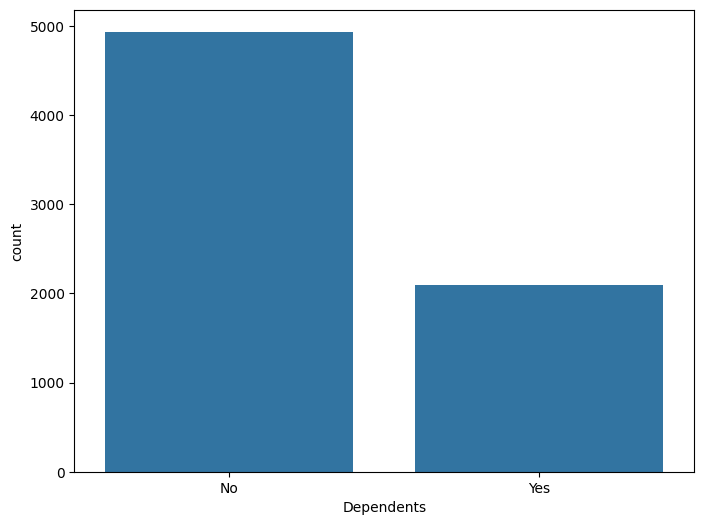

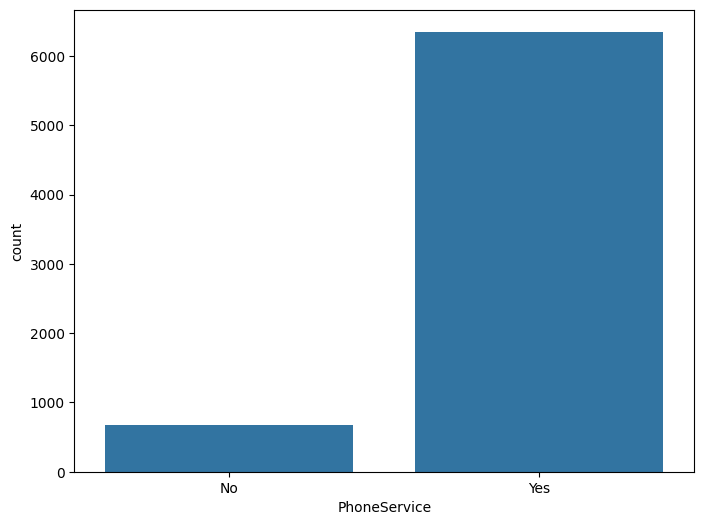

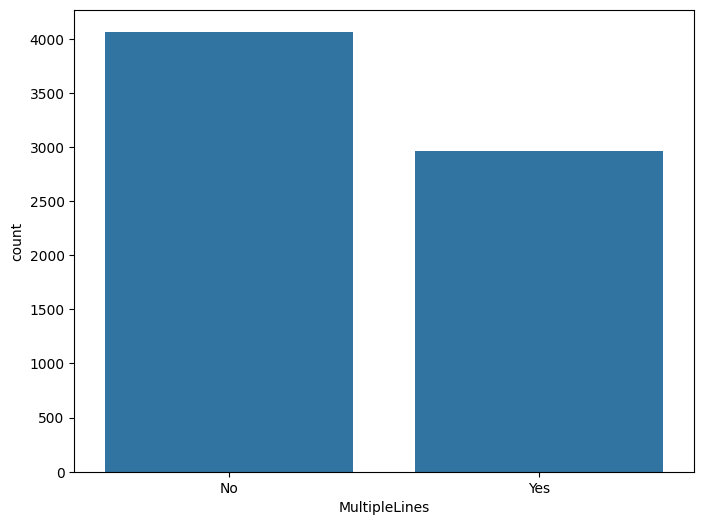

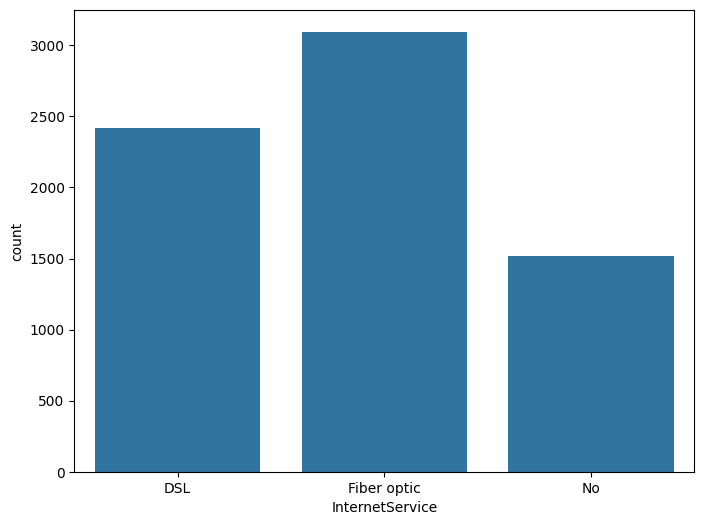

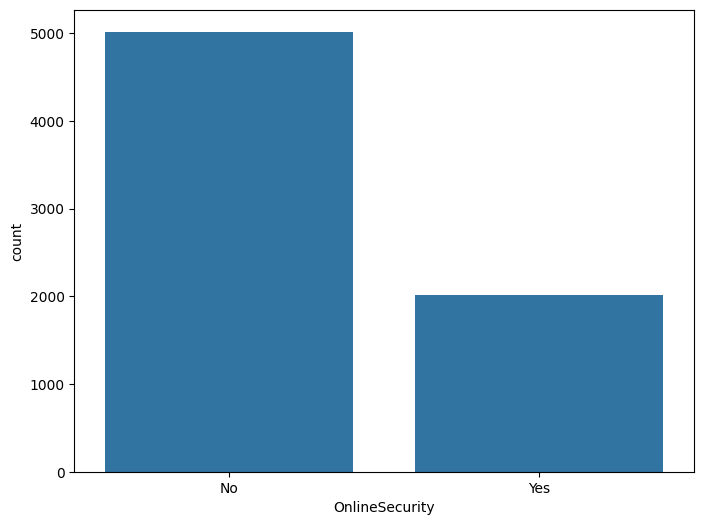

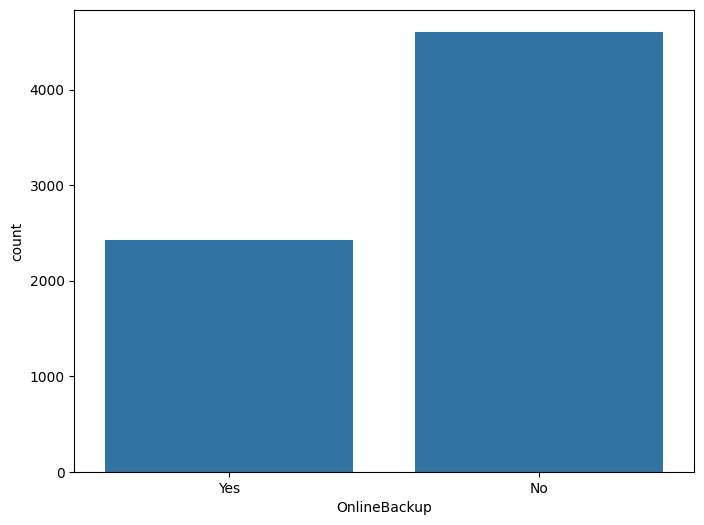

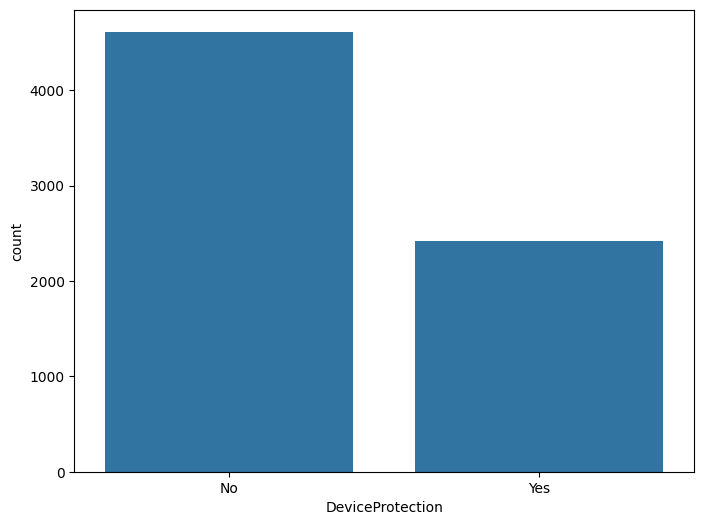

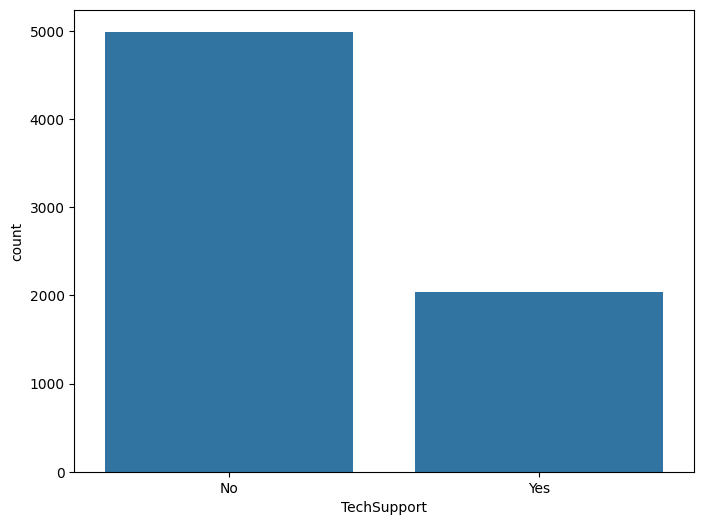

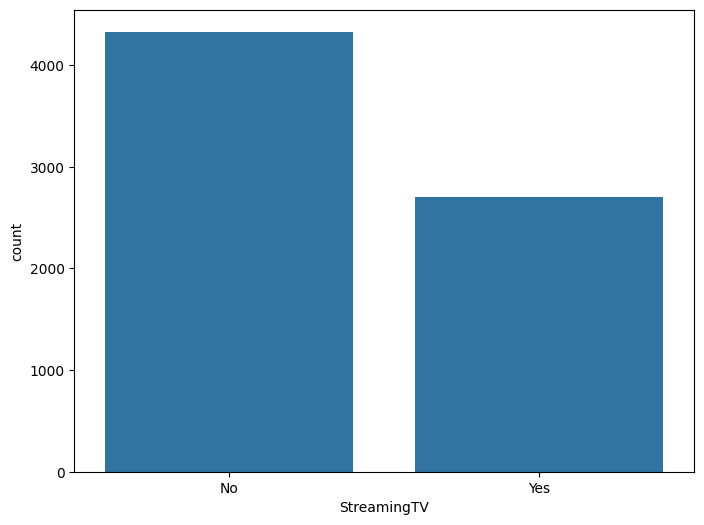

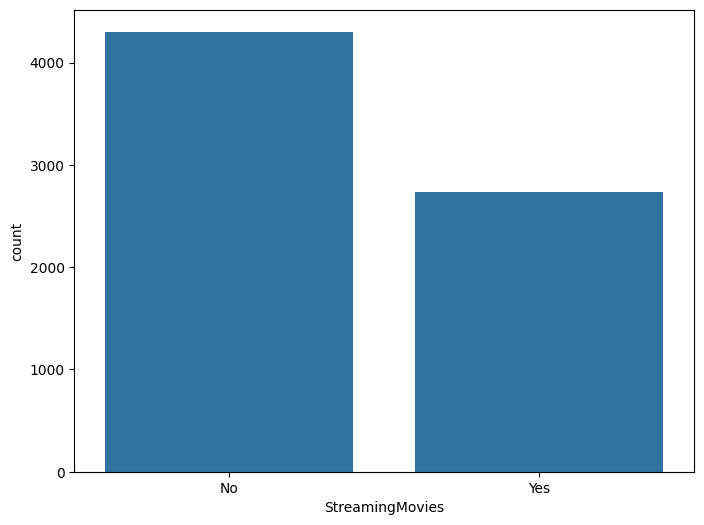

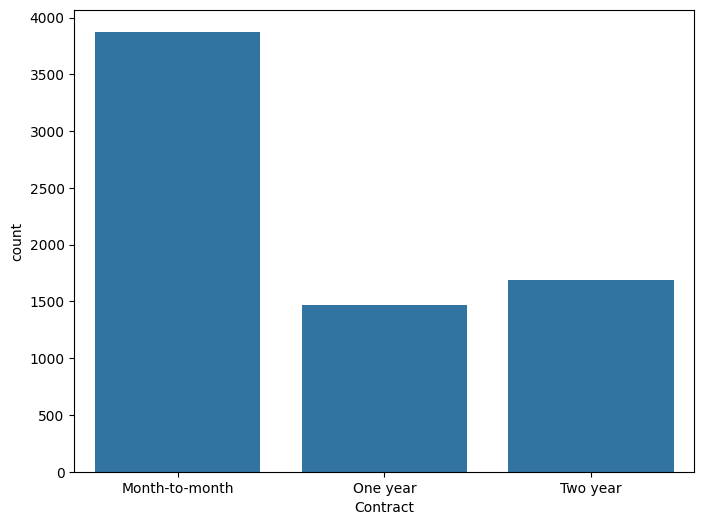

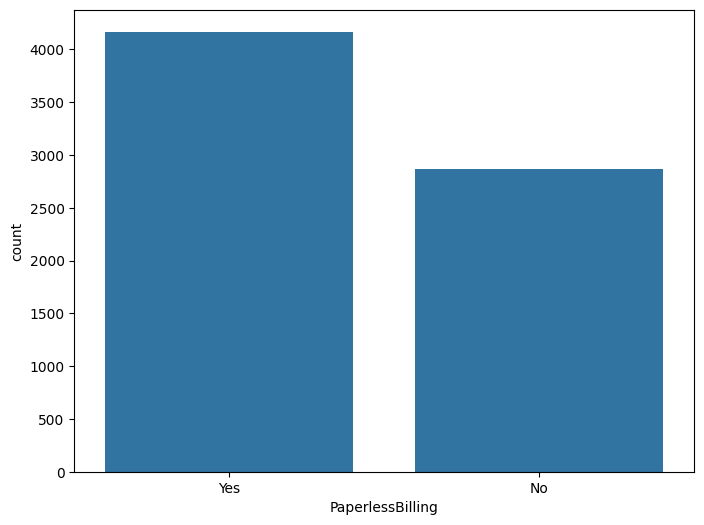

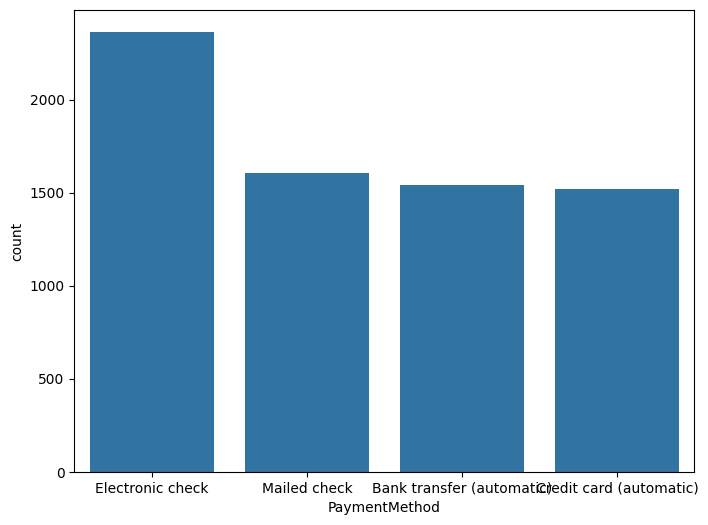

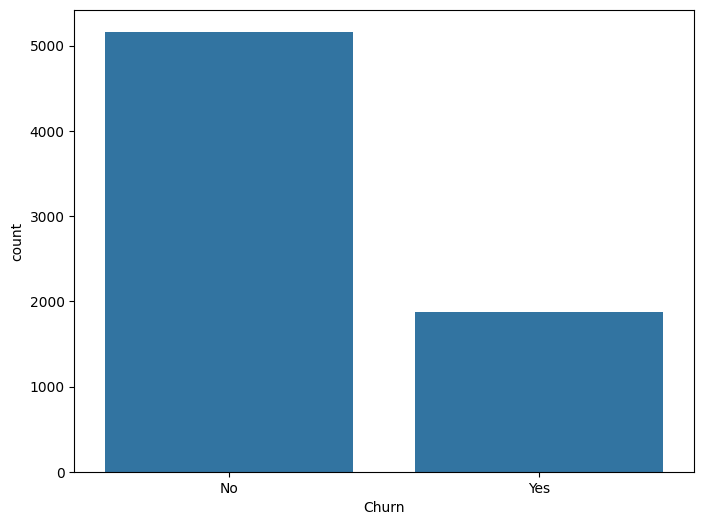

In [362]:
# sns.f
for col in df.columns:
  if df[col].dtype == 'O':
    plt.figure(figsize=(8,6))
    sns.countplot(df , x=col)

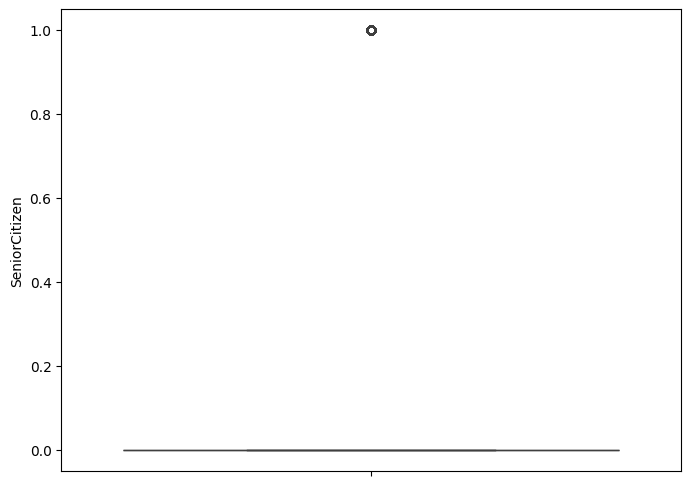

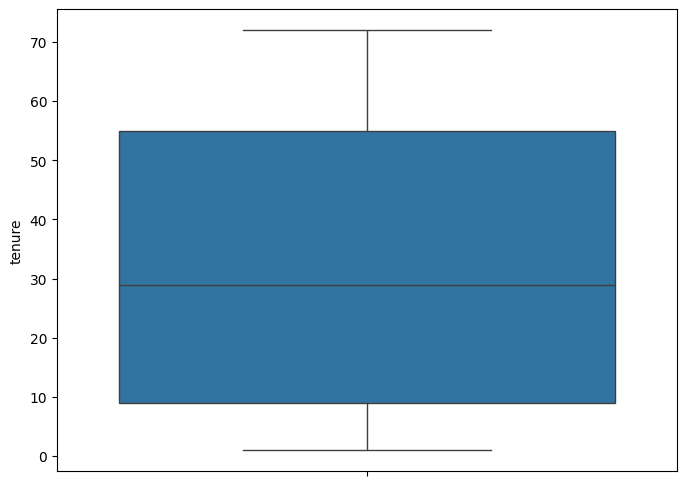

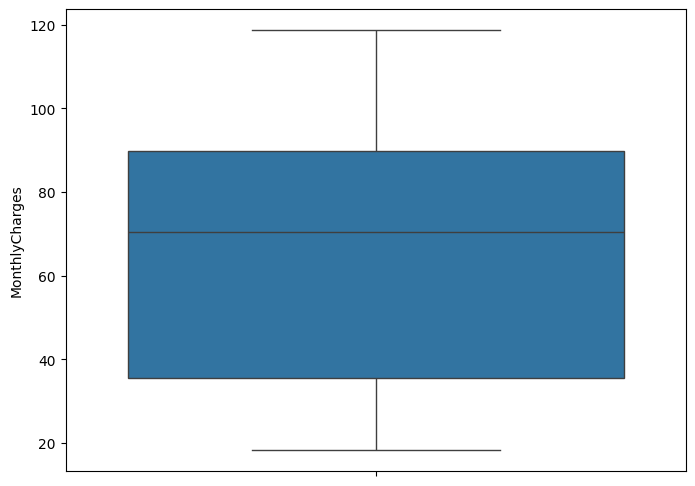

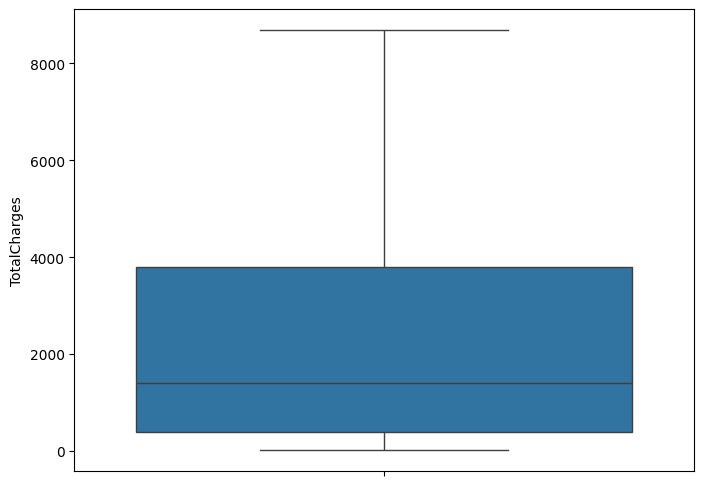

In [364]:
for col in df.columns:
  if df[col].dtype != 'O':
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])

In [525]:
# first we try implenet xgboost without making 3 category to 2 category of yes , no

len(cat_column) , pd.get_dummies(df , columns=cat_column , drop_first=True).shape[1]

(16, 24)

In [526]:
encode_df = pd.get_dummies(df , columns=cat_column , drop_first=True , dtype=int)

In [527]:
encode_df.corr()['Churn_Yes']

SeniorCitizen                            0.150541
tenure                                  -0.354049
MonthlyCharges                           0.192858
TotalCharges                            -0.199484
gender_Male                             -0.008545
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
TechSupport_Yes                         -0.164716
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
Contract_One year                       -0.178225
Contract_Two year                       -0.301552
PaperlessBilling_Yes                     0.191454


In [528]:
encode_df.duplicated().sum()

22

In [529]:
encode_df= encode_df.drop_duplicates()

In [530]:
encode_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [531]:
X = encode_df.drop('Churn_Yes' , axis=1)
y = encode_df['Churn_Yes']

In [532]:
# 1 means customer is churn(YES), 0 means not churned(NO)
y.value_counts()

Churn_Yes
0    5153
1    1857
Name: count, dtype: int64

In [533]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1 , stratify=y )

In [365]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [366]:
y_pred = xgc.predict(X_test)

In [367]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7746077032810271

In [369]:
param_grid= {
    'learning_rate' : [0.1 , 0.2 , 0.3 , 0.4 ] ,
    'max_depth' : [ 3 , 4 , 5 , 6 , 7] ,
    'gamma' : [0.001 , 0.1 , 0.5 , 1] ,
    'n_estimators' : [90,100,120 , 130 , 140]
}
gsc = GridSearchCV(estimator = XGBClassifier() , param_grid=param_grid , cv=5 , n_jobs=-1)
gsc.fit(X,y)
gsc.best_params_ , gsc.best_score_

({'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 130},
 0.8079885877318118)

In [305]:
# Our model suffer overfitting
y_pred = xgc.predict(X_train)
accuracy_score(y_train , y_pred)

0.9372325249643366

In [306]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test , y_pred) ,

0.7731811697574893

In [307]:
# Our model suffer overfitting
y_pred = rfc.predict(X_train)
accuracy_score(y_train , y_pred)

0.9978601997146933

In [328]:
params_grid = {
    'n_estimators' : [ 8 , 9 , 10 , 12 ],
    'max_depth' : [7 ,8 , 9 , 10],
    'min_samples_split' : [2,3,4 , 5]
}
gsc = GridSearchCV(RandomForestClassifier() , params_grid , n_jobs=-1 , cv=5 , scoring='f1' )

In [329]:
gsc.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [8, 9, 10, 12]},
             scoring='f1')

In [330]:
gsc.best_score_ , gsc.best_params_

(0.5728114732779107,
 {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 10})

In [348]:
# from sklearn.preprocessing import class
from sklearn.metrics import f1_score , confusion_matrix , classification_report
# We get this values
# (0.8018544935805993,
#  {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 12})
rfc_tune = RandomForestClassifier(max_depth=10 , min_samples_split=5 , n_estimators=10)
rfc_tune.fit(X_train , y_train)
y_pred = rfc_tune.predict(X_train)
accuracy_score(y_train , y_pred) , f1_score(y_train , y_pred)

(0.8643009985734664, 0.7135867519759126)

In [349]:
confusion_matrix(y_train , y_pred)

array([[3899,  223],
       [ 538,  948]])

In [350]:
print(classification_report(y_train , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4122
           1       0.81      0.64      0.71      1486

    accuracy                           0.86      5608
   macro avg       0.84      0.79      0.81      5608
weighted avg       0.86      0.86      0.86      5608



# **Generalized preprocessing function and create pipeline for model**

In [371]:
from sklearn.pipeline import Pipeline

In [490]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [491]:
# Here we create generalize preprocessing function
def preprocessing(df):
  df.drop('customerID' , inplace=True , axis=1)

  # Collect categorical column
  cat_column = []
  for col in df.columns:
    if df[col].dtype == 'O':
      cat_column.append(col)

  # We simply remove blank total charges column
  df = df[df['TotalCharges'] != ' ']

  # This step will be added in preprocessing function
  df['TotalCharges'] = df['TotalCharges'].astype(float)
  cat_column.remove('TotalCharges')

  # In multilines ,TechSupport ,  ....  we should replce No phone service to No , because it doesnot make sense
  df = df.replace({'No internet service' : 'No' , 'No phone service':'No'})

  # Drop duplicates
  df= df.drop_duplicates()

  # Pandas OHE
  df = pd.get_dummies(df , columns=cat_column , drop_first=True , dtype=int)
  return df

custom_transformer = FunctionTransformer(preprocessing , validate=False)

preprocessor = ColumnTransformer(transformers=[
    ('preprocess' , custom_transformer , ['customerID'] )
],remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor' , preprocessor),
    ('model' , RandomForestClassifier(max_depth=10 , min_samples_split=5 , n_estimators=10))
])


In [560]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test , y_pred)

In [561]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
# Assume df is your original DataFrame, X_train and X_test are your feature matrices
# and y_train, y_test are your target vectors
# Example:
# df = pd.read_csv("your_data.csv")

# Split data into features (X) and target (y)
# Here, we assume that the target column is named 'target'
# Adjust this according to your actual column names
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing function
def preprocessing(df):
    df = df.copy()  # Make a copy to avoid modifying the original DataFrame

    # Perform preprocessing steps
    df.drop('customerID', inplace=True, axis=1)
    df = df[df['TotalCharges'] != ' ']
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df = df.replace({'No internet service': 'No', 'No phone service': 'No'})
    df = df.drop_duplicates()
    df = pd.get_dummies(df, drop_first=True, dtype=int)

    return df

# Custom transformer for preprocessing
preprocessing_transformer = FunctionTransformer(preprocessing, validate=False)

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessing_transformer),
    ('model', RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10))
])

# Now you can fit the pipeline using X_train and y_train
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipeline.predict(X_test)

# Evaluate the model
# (evaluation code depends on the specific problem and metrics of interest)


In [557]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))